<a href="https://colab.research.google.com/github/SJSY126/gasyori100/blob/master/01_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q  --user numpy matplotlib opencv-python sklearn scikit-image --upgrade

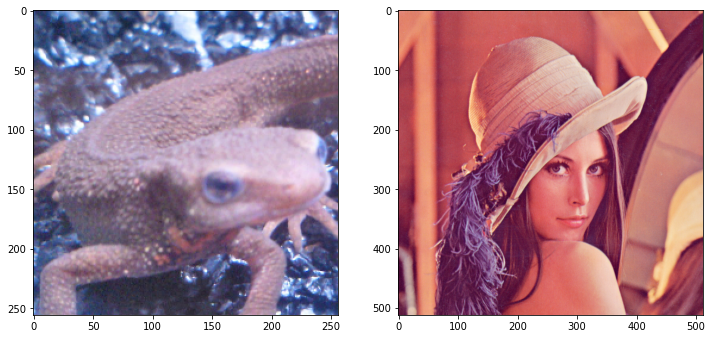

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')
img_lena = io.imread('http://www.ess.ic.kanagawa-it.ac.jp/std_img/colorimage/lena_std.bmp')


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_orig)
plt.subplot(1,2,2)
plt.imshow(img_lena)
plt.show()

In [0]:
def rgb2gray(img):
    _img = img.copy().astype(np.float32)
    img_gray = 0.2126*_img[...,0] + 0.7153*_img[...,1] + 0.0722*_img[...,2]
    img_gray = np.clip(img_gray,0,255)
    return img_gray.astype(np.uint8)

def binary(img_gray,th):
    _img = img_gray.copy().astype(np.float32)
    img_binary = np.minimum(_img//th, 1)
    img_binary = np.clip(img_binary,0,255)
    return img_binary.astype(np.uint8)

def rgb2binary(img,th):
    _img = img.copy().astype(np.float32)
    img_gray = rgb2gray(_img)
    img_binary = binary(img_gray,th)
    return img_binary

def otsu_thresh(img):
    _img = img_orig.copy().astype(np.float32)

    max_vari = -1
    max_th = -1

    for th in range(1,254):
        m0 = _img[_img <= th].mean()
        m1 = _img[_img >  th].mean()
        w0 = _img[_img <= th].size
        w1 = _img[_img > th].size
        vari = w0 * w1 / ((w0 + w1) ** 2) * ((m0 - m1) ** 2) 
        if vari > max_vari:
            max_vari = vari
            max_th = th

    return rgb2binary(_img, max_th)


# 01　チャネル入れ替え

In [20]:
img_orig.shape

(256, 256, 3)

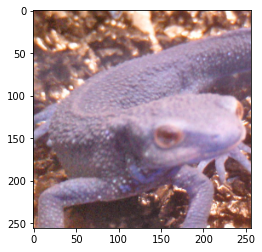

In [21]:
ans = img_orig[...,::-1]
plt.imshow(ans)
plt.show()

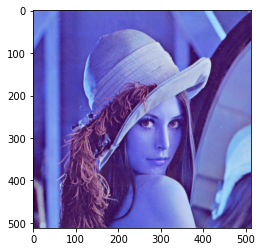

In [22]:
ans = img_lena[...,::-1]
plt.imshow(ans)
plt.show()

#02　グレースケール

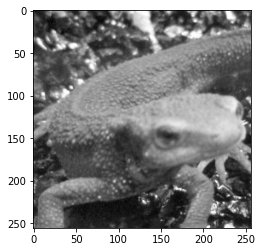

In [23]:
_img = img_orig.copy().astype(np.float32)
ans=0.2126*_img[...,0]+0.7153*_img[...,1]+0.0722*_img[...,2]
ans = np.clip(ans,0,255).astype(np.uint8)
plt.imshow(ans, cmap="gray")
plt.show()

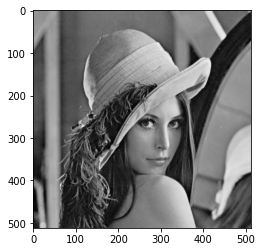

In [24]:
gray = rgb2gray(img_lena)
plt.imshow(gray, cmap="gray")
plt.show()

#03　二値化

255


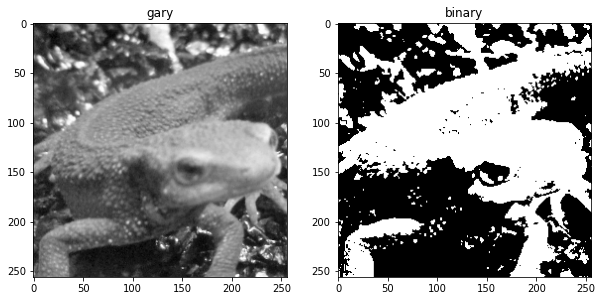

In [29]:
_img = img_orig.copy().astype(np.float32)
gray = rgb2gray(_img)
ans = np.minimum(gray//128, 1)*255
print(ans[100,100])
ans = ans.astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("gary")
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.title("binary")
plt.imshow(ans, cmap="gray")
plt.show()

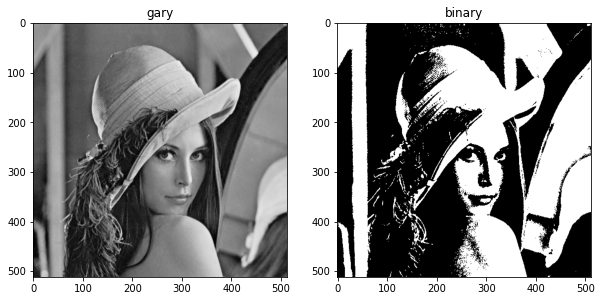

In [31]:
ans = rgb2binary(img_lena,128)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("gary")
plt.imshow(rgb2gray(img_lena), cmap='gray')
plt.subplot(1,2,2)
plt.title("binary")
plt.imshow(ans, cmap="gray")
plt.show()

#04 大津の二値化

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html



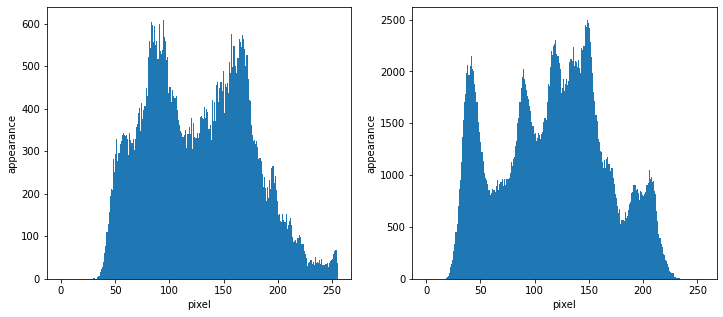

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(rgb2gray(img_orig).ravel(), bins=255, range=(0, 255))
plt.xlabel('pixel')
plt.ylabel('appearance')

plt.subplot(1,2,2)
plt.hist(rgb2gray(img_lena).ravel(), bins=255, range=(0, 255))
plt.xlabel('pixel')
plt.ylabel('appearance')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


thresh: 135


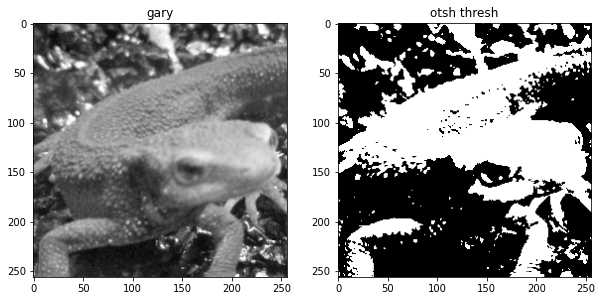

In [40]:
_img = img_orig.copy().astype(np.float32)

max_vari = -1
max_th = -1

for th in range(1,254):
    m0 = _img[_img <= th].mean()
    m1 = _img[_img >  th].mean()
    w0 = _img[_img <= th].size
    w1 = _img[_img > th].size
    vari = w0 * w1 / ((w0 + w1) ** 2) * ((m0 - m1) ** 2) 
    if vari > max_vari:
        max_vari = vari
        max_th = th

img_otsu_th = rgb2binary(_img,max_th) 
print("thresh:", max_th)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("gary")
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.title("otsh thresh")
plt.imshow(img_otsu_th, cmap="gray")
plt.show()

thresh: 135


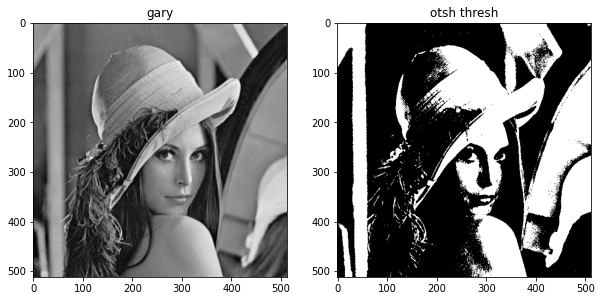

In [43]:
img_otsu_th = rgb2binary(img_lena,max_th) 
print("thresh:", max_th)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("gary")
plt.imshow(rgb2gray(img_lena), cmap='gray')
plt.subplot(1,2,2)
plt.title("otsh thresh")
plt.imshow(img_otsu_th, cmap="gray")
plt.show()

#05 HSV変換